In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
#NFL Colors
nfl_red = "#D50A0A"  # NFL red
nfl_blue = "#013369"  # Official NFL blue

In [4]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving aggregated_final_df.csv to aggregated_final_df.csv


In [5]:
aggregated_final_df = pd.read_csv('aggregated_final_df.csv')

In [6]:
# Group data by RB, WR, and TE motion, and calculate the average target_rush
motion_combined = aggregated_final_df.groupby(['rb_snap_motion', 'wr_snap_motion', 'te_snap_motion'])[['target_rush']].mean().reset_index()

# Calculate probabilities for run and pass plays
motion_combined['run_probability'] = motion_combined['target_rush']  # Run probability
motion_combined['pass_probability'] = 1 - motion_combined['target_rush']  # Pass probability

# Create a combined motion type label for each combination
motion_combined['motion_type'] = (
    'RB:' + motion_combined['rb_snap_motion'].astype(str) +  # Add RB motion status
    ' | WR:' + motion_combined['wr_snap_motion'].astype(str) +  # Add WR motion status
    ' | TE:' + motion_combined['te_snap_motion'].astype(str)  # Add TE motion status
)

# Select only the relevant columns for analysis and visualization
motion_combined = motion_combined[['motion_type', 'run_probability', 'pass_probability']]


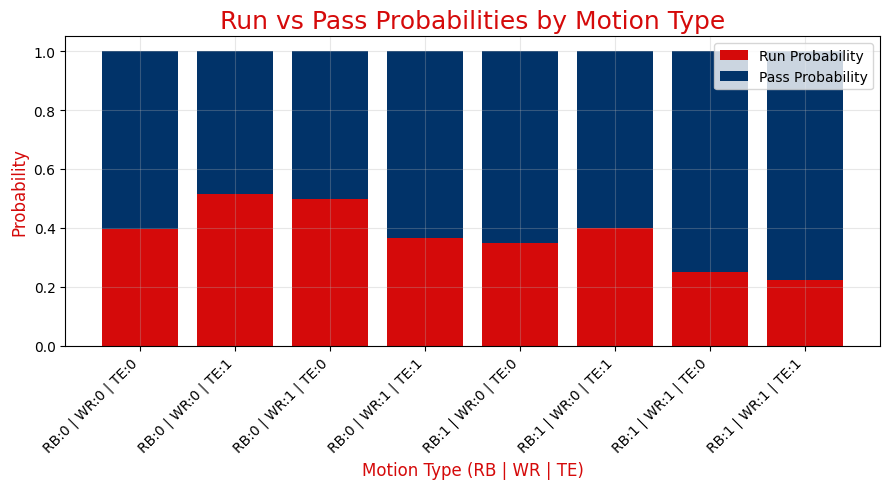

In [18]:
plt.figure(figsize=(9, 5))

# Visualize probabilities with solid NFL colors
plt.bar(
    motion_combined['motion_type'],
    motion_combined['run_probability'],
    color=nfl_red,
    alpha=1.0,  # Solid red
    label='Run Probability'
)
plt.bar(
    motion_combined['motion_type'],
    motion_combined['pass_probability'],
    bottom=motion_combined['run_probability'],
    color=nfl_blue,
    alpha=1.0,  # Solid blue
    label='Pass Probability'
)

# Add titles and labels with updated header color
plt.title('Run vs Pass Probabilities by Motion Type', fontsize=18, color=nfl_red)
plt.xlabel('Motion Type (RB | WR | TE)', fontsize=12, color=nfl_red)
plt.ylabel('Probability', fontsize=12, color=nfl_red)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# Group by offensive formation and calculate average target_rush
formation_analysis = aggregated_final_df.groupby('offenseFormation')[['target_rush']].mean().reset_index()

# Calculate run and pass probabilities
formation_analysis['run_probability'] = formation_analysis['target_rush']
formation_analysis['pass_probability'] = 1 - formation_analysis['target_rush']

# Sort by run probability for better visualization
formation_analysis = formation_analysis.sort_values('run_probability', ascending=False)


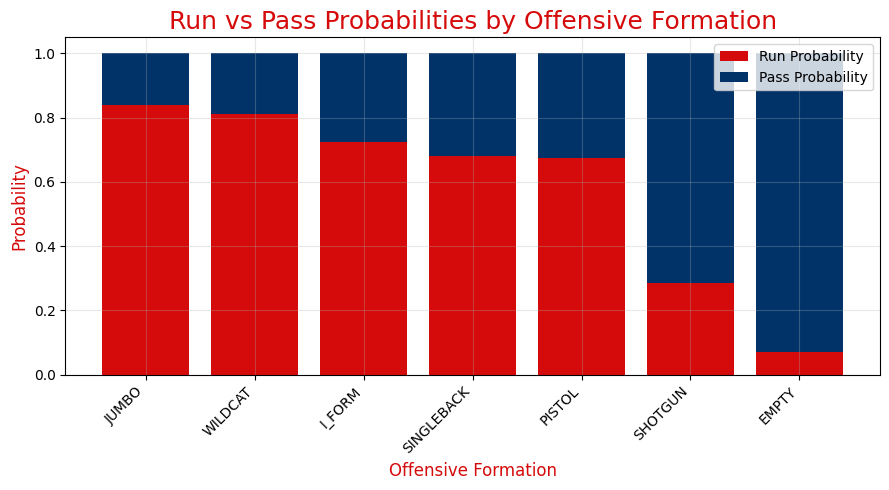

In [17]:
plt.figure(figsize=(9, 5))
# Visualize probabilities
plt.bar(
    formation_analysis['offenseFormation'],
    formation_analysis['run_probability'],
    color=nfl_red,
    alpha=1.0,  # Solid red
    label='Run Probability'
)
plt.bar(
    formation_analysis['offenseFormation'],
    formation_analysis['pass_probability'],
    bottom=formation_analysis['run_probability'],
    color=nfl_blue,
    alpha=1.0,  # Solid blue
    label='Pass Probability'
)

# Add titles and labels
plt.title('Run vs Pass Probabilities by Offensive Formation', fontsize=18, color=nfl_red)
plt.xlabel('Offensive Formation', fontsize=12, color=nfl_red)
plt.ylabel('Probability', fontsize=12, color=nfl_red)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving aggregated_final_df.csv to aggregated_final_df (1).csv


In [20]:
aggregated_final_df = pd.read_csv('aggregated_final_df.csv')

In [21]:
# Define the relevant columns for analysis
analysis_columns = [
    'down', 'yardsToGo', 'offenseFormation', 'receiverAlignment',
    'rb_depth', 'target_rush', 'expectedPoints'
]

# Filter dataset
updated_data = aggregated_final_df[analysis_columns]

In [22]:
# Analyze 'down' and 'yardsToGo' impact on play type (rush probability)
down_distance_analysis = updated_data.groupby(['down', 'yardsToGo'])['target_rush'].mean().reset_index()
down_distance_analysis.rename(columns={'target_rush': 'avg_rush_probability'}, inplace=True)

# Analyze offensive formations' correlation with rushing play
formation_analysis = updated_data.groupby('offenseFormation')['target_rush'].mean().reset_index()
formation_analysis.rename(columns={'target_rush': 'avg_rush_probability'}, inplace=True)

# Analyze wide receiver alignments' impact on rushing play
alignment_analysis = updated_data.groupby('receiverAlignment')['target_rush'].mean().reset_index()
alignment_analysis.rename(columns={'target_rush': 'avg_rush_probability'}, inplace=True)

# Analyze running back depth impact on rushing play
rb_depth_analysis = updated_data.groupby('rb_depth')['target_rush'].mean().reset_index()
rb_depth_analysis.rename(columns={'target_rush': 'avg_rush_probability'}, inplace=True)

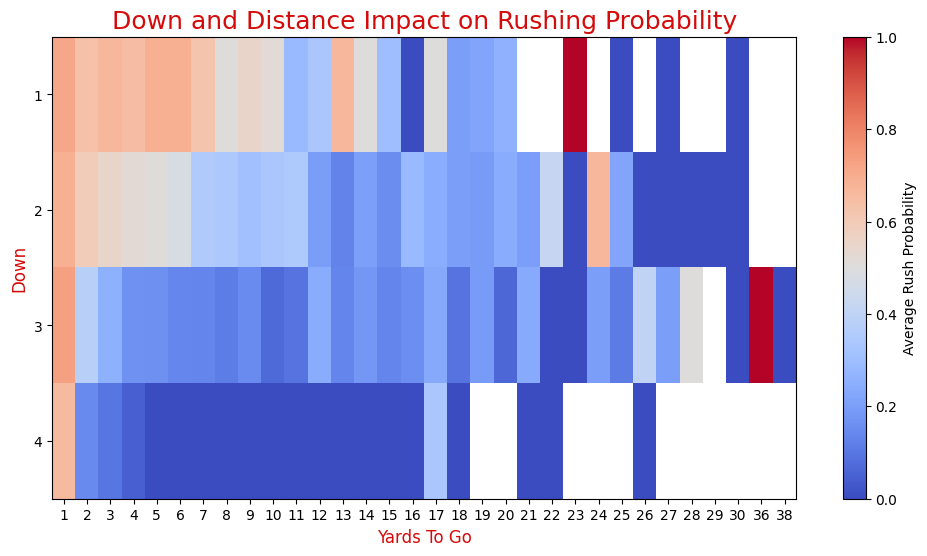

In [29]:
#Down and Distance Impact Analysis
down_distance_pivot = down_distance_analysis.pivot(index='down', columns='yardsToGo', values='avg_rush_probability')
plt.figure(figsize=(12, 6))
plt.imshow(down_distance_pivot, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Average Rush Probability')
plt.title('Down and Distance Impact on Rushing Probability', fontsize=18, color=nfl_red)
plt.xlabel('Yards To Go', fontsize=12, color=nfl_red)
plt.ylabel('Down', fontsize=12, color=nfl_red)
plt.xticks(ticks=np.arange(down_distance_pivot.shape[1]), labels=down_distance_pivot.columns, fontsize=10)
plt.yticks(ticks=np.arange(down_distance_pivot.shape[0]), labels=down_distance_pivot.index, fontsize=10)
plt.show()

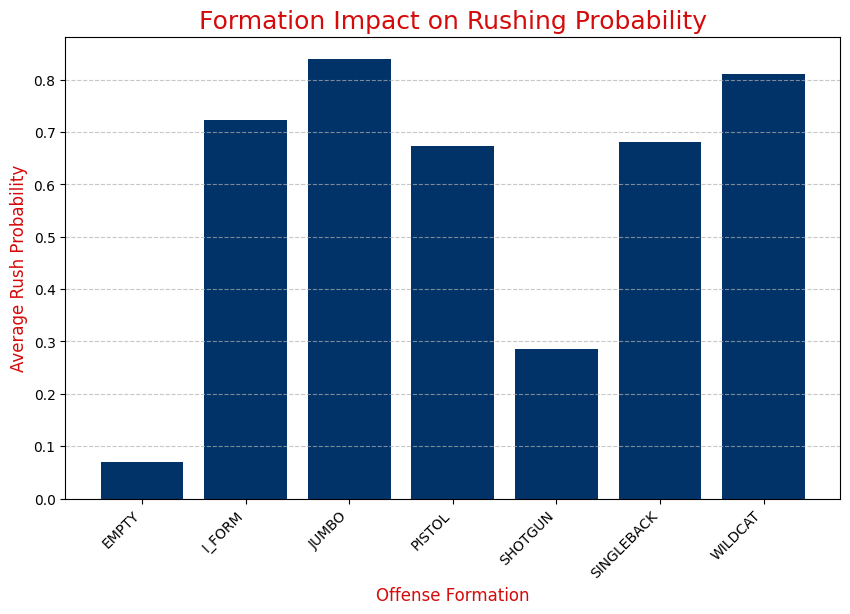

In [31]:
#Formation Impact on Rushing
plt.figure(figsize=(10, 6))
plt.bar(formation_analysis['offenseFormation'], formation_analysis['avg_rush_probability'], color=nfl_blue)
plt.title('Formation Impact on Rushing Probability', fontsize=18, color=nfl_red)
plt.xlabel('Offense Formation', fontsize=12, color=nfl_red)
plt.ylabel('Average Rush Probability', fontsize=12, color=nfl_red)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

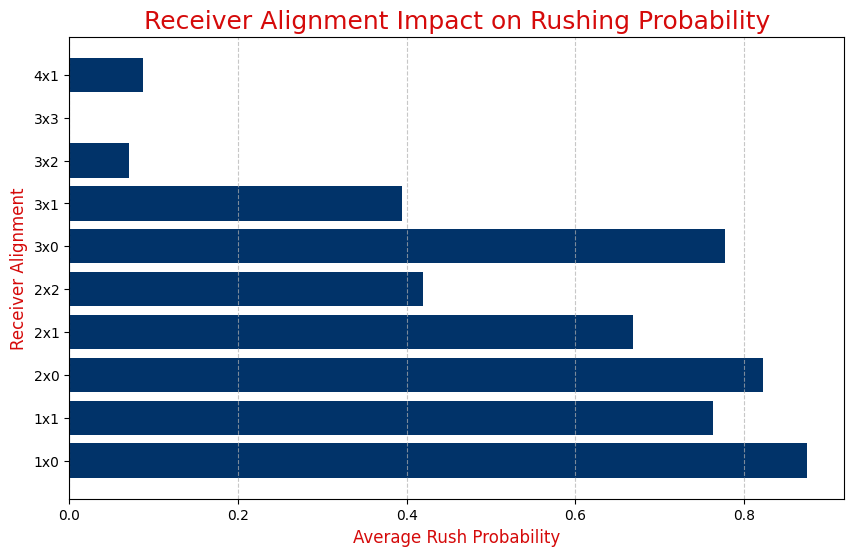

In [32]:
#Receiver Alignment Impact on Rushing
plt.figure(figsize=(10, 6))
plt.barh(alignment_analysis['receiverAlignment'], alignment_analysis['avg_rush_probability'], color=nfl_blue)
plt.title('Receiver Alignment Impact on Rushing Probability', fontsize=18, color=nfl_red)
plt.xlabel('Average Rush Probability', fontsize=12, color=nfl_red)
plt.ylabel('Receiver Alignment', fontsize=12, color=nfl_red)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-35-132490592dca>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rb_depth_binned_analysis = aggregated_final_df.groupby('rb_depth_binned')['target_rush'].mean().reset_index()


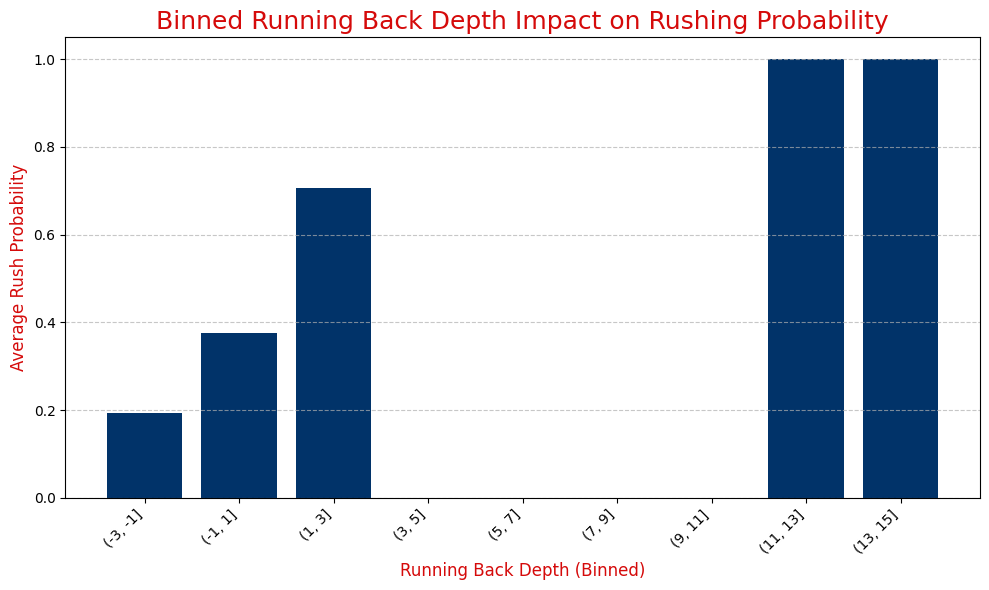

In [35]:
# Bin the 'rb_depth' values into intervals for better visualization
bins = np.arange(
    int(aggregated_final_df['rb_depth'].min()),
    int(aggregated_final_df['rb_depth'].max()) + 2, 2
)
aggregated_final_df['rb_depth_binned'] = pd.cut(aggregated_final_df['rb_depth'], bins)

# Recalculate average rushing probability for each bin
rb_depth_binned_analysis = aggregated_final_df.groupby('rb_depth_binned')['target_rush'].mean().reset_index()
rb_depth_binned_analysis.rename(columns={'target_rush': 'avg_rush_probability'}, inplace=True)

# Visualize the binned data
plt.figure(figsize=(10, 6))
plt.bar(
    rb_depth_binned_analysis['rb_depth_binned'].astype(str),
    rb_depth_binned_analysis['avg_rush_probability'],
    color=nfl_blue
)
plt.title('Binned Running Back Depth Impact on Rushing Probability', fontsize=18, color=nfl_red)
plt.xlabel('Running Back Depth (Binned)', fontsize=12, color=nfl_red)
plt.ylabel('Average Rush Probability', fontsize=12, color=nfl_red)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()